# 한국어 텍스트 처리에 적합한 임베딩

## BERT (Bidirectional Encoder Representations from Transformers)
https://huggingface.co/
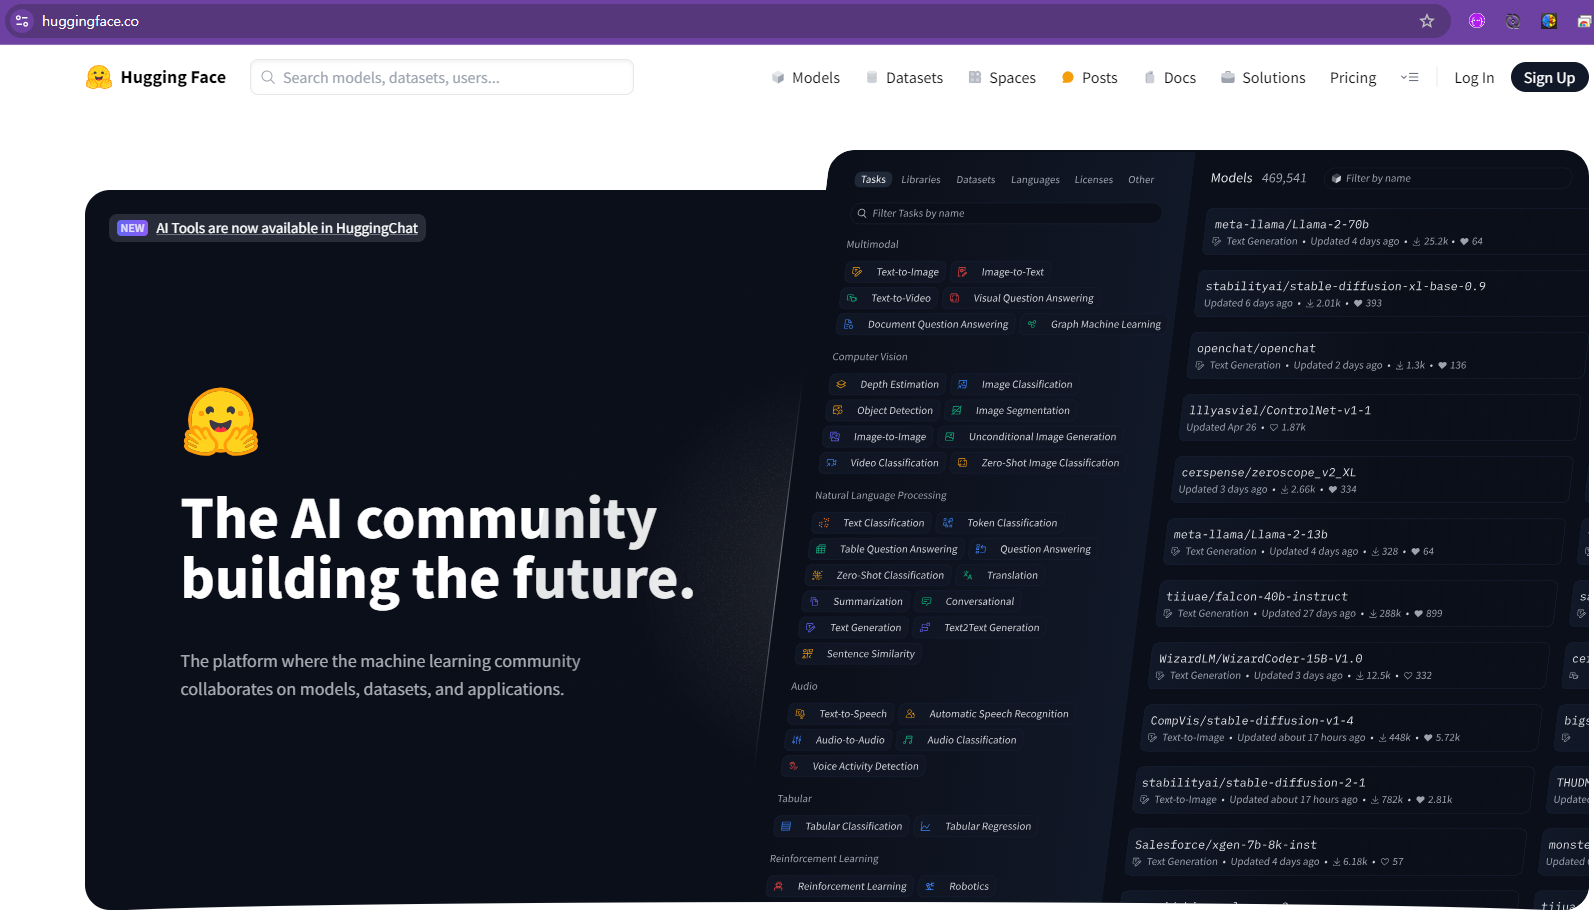

    문맥 이해
    	문맥을 양방향으로 이해할 수 있기 때문에 문장의 맥락을 잘 반영
    	한국어와 같이 문맥에 따라 의미가 달라지는 언어에 특히 유리
    사전 학습
    	대규모 텍스트 데이터에서 사전 학습되었기 때문에, 다양한 언어 패턴을 이해할 수 있음
    Fine-tuning 가능
    	특정 작업에 맞게 미세 조정(fine-tuning)할 수 있어, 감정 분석, 질문 응답, 텍스트 분류 등 다양한 NLP 작업에 적합


## Word2Vec 및 FastText
    어휘 표현
    	Word2Vec과 FastText는 단어를 벡터로 표현하여, 단어 간의 유사성을 효과적으로 학습 가능
    서브워드 정보 활용 (FastText)
    	FastText는 단어 내부의 서브워드 정보를 활용하여, 특히 희귀 단어와 형태소 언어(한국어 등)에 유리

## KoBERT
    한국어에 특화된 BERT 모델로, BERT의 구조를 기반으로 한국어 텍스트 데이터에서 학습된 모델
    한국어 특화
    	KoBERT는 한국어 데이터에서 학습되어 한국어의 특성을 잘 반영
    문맥 이해
    	BERT와 마찬가지로 문맥을 양방향으로 이해할 수 있어, 정확한 의미 파악에 유리


In [1]:
#!pip install transformers tf-keras

In [1]:
import os
import warnings
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf

# 경고 메시지 무시
warnings.filterwarnings('ignore', category=FutureWarning)

# TensorFlow 경고 메시지 억제
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# KoBERT 모델 및 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained('monologg/kobert')
model = TFBertModel.from_pretrained('monologg/kobert')

# 예시 문서
text = "저는 오늘 아침에 커피를 마시며, 어제 친구와 함께 갔던 영화관에 대해 이야기했습니다."

# 토크나이징
inputs = tokenizer(text, return_tensors='tf')

# BERT 모델을 사용하여 임베딩 생성
outputs = model(**inputs)

# 문장 벡터 출력 (CLS 토큰 벡터 사용)
sentence_vector = outputs.last_hidden_state[:, 0, :].numpy()
print("문장 벡터:")
print(sentence_vector)

All PyTorch model weights were used when initializing TFBertModel.

All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


문장 벡터:
[[-5.20425066e-02 -4.18721959e-02  3.82480025e-01 -5.41239977e+00
   1.58483133e-01  1.64957315e-01  7.10933357e-02  1.30510524e-01
  -6.50073230e-01 -2.44621515e-01 -1.14947689e+00  1.59386620e-02
  -1.09728821e-01 -4.55277771e-01  3.03883314e-01 -3.63921821e-02
  -1.78342149e-01  3.51396129e-02  1.53755397e-01 -1.55184284e-01
  -2.77261794e-01  3.29366475e-02 -2.30784446e-01  1.58304013e-02
  -4.27942395e-01  1.06038839e-01 -9.92274955e-02 -5.05254030e-01
   9.55468118e-02  5.23597598e-01  5.05428553e-01  3.00788507e-02
   1.10630453e-01  3.85771953e-02  3.70509744e-01  5.01352362e-03
   3.75629306e-01  6.04723215e-01  2.45958328e-01 -3.92750025e-01
   4.64111298e-01  2.78621942e-01  3.39734226e-01  1.68825001e-01
   6.39297366e-02 -8.75417665e-02 -4.50227469e-01  9.22389477e-02
   4.58904982e-01 -3.32637876e-02  4.49246764e-01 -7.42619336e-02
   9.32845399e-02 -2.37162530e-01  4.55457777e-01 -1.27384022e-01
   3.49312723e-01 -2.85339117e-01 -4.67572361e-01  4.54061441e-02
  -

# 임베딩 후 진행할 수 있는 작업 들
- Text Classification(텍스트 분류)
- Document Clustering(문서 군집화)
- Text Summarization(텍스트 요약)
- Question Answering(질의 응답)
- Machine Translation(기계 번역)
- Vector Similarity(유사성 검색)
- Visualization(시각화)
- Transfer Learning(전이 학습)

### Text Classification(텍스트 분류)
    텍스트 분류는 주어진 텍스트를 사전 정의된 카테고리로 분류하는 작업
    임베딩 벡터를 입력으로 사용하여 분류 작업을 수행할 수 있음
    텍스트 분류, 감정 분석, 스팸 필터링 등

#### 예시)

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# 예시 문서와 레이블
documents = [
    "이 영화 정말 최고에요!",
    "영화가 정말 지루했어요.",
    "배우들이 연기를 정말 잘했어요.",
    "스토리가 너무 별로였어요."
]
labels = [1, 0, 1, 0]  # 1: 긍정, 0: 부정

# 텍스트 전처리 및 토큰화
tokenizer = Tokenizer()
tokenizer.fit_on_texts(documents)
sequences = tokenizer.texts_to_sequences(documents)
word_index = tokenizer.word_index

# 시퀀스 패딩
max_length = max(len(seq) for seq in sequences)
data = pad_sequences(sequences, maxlen=max_length)

# Numpy 배열로 변환
data = np.array(data)
labels = np.array(labels)

# 딥러닝 모델 구축
model = Sequential()
model.add(Embedding(len(word_index) + 1, 128))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(data, labels, epochs=5, batch_size=2)

# 예측 및 평가
loss, accuracy = model.evaluate(data, labels)
print("모델 정확도:", accuracy)


Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.5000 - loss: 0.6945
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6667 - loss: 0.6851 
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.6708 
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.6594 
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.6429 
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step - accuracy: 1.0000 - loss: 0.6271
모델 정확도: 1.0


### Document Clustering(문서 군집화)
    임베딩 벡터를 사용하여 데이터를 그룹화하는 작업
    K-평균 클러스터링(K-means clustering)과 같은 알고리즘을 사용하여 유사한 항목들을 클러스터로 묶을 수 있음

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 예시 문서
documents = [
    "이 영화 정말 최고에요!",
    "영화가 정말 지루했어요.",
    "배우들이 연기를 정말 잘했어요.",
    "스토리가 너무 별로였어요."
]

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# K-평균 군집화
num_clusters = 2
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)

# 군집화 결과 출력
clusters = km.labels_.tolist()
print("문서 군집화 결과:", clusters)


문서 군집화 결과: [0, 0, 1, 1]


### Text Summarization(텍스트 요약)
    문서 요약은 긴 문서를 짧게 요약하는 작업
    추출적 요약과 생성적 요약이 있음

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# 예시 문서
document = """
저는 오늘 아침에 커피를 마시며, 어제 친구와 함께 갔던 영화관에 대해 이야기했습니다. 
그 영화는 정말 재미있었고, 다시 보고 싶은 생각이 들었습니다. 
영화가 끝난 후에는 친구들과 함께 저녁을 먹으러 갔습니다. 
우리는 피자를 시켜 먹었고, 그 자리에서 많은 이야기를 나눴습니다. 
친구 중 한 명이 최근에 직장을 옮겼는데, 새로운 직장에 대해 많은 이야기를 해주었습니다. 
다른 친구는 최근에 결혼했는데, 결혼 생활에 대해 이야기해주었습니다. 
저는 그 이야기를 들으면서 정말 기뻤습니다. 
그리고 우리는 디저트로 아이스크림을 먹었습니다. 
저는 바닐라 아이스크림을 먹었고, 친구는 초콜릿 아이스크림을 먹었습니다. 
식사가 끝난 후에는 모두 집으로 돌아갔습니다. 
저는 집에 돌아와서 하루를 돌아보며 일기를 썼습니다. 
오늘 하루는 정말 즐거운 시간이었습니다. 
"""

# 문장을 나누고 TF-IDF 벡터화
sentences = document.split('. ')
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sentences)

# 문장 중요도 계산 (가장 높은 TF-IDF 값을 가지는 문장 선택)
sentence_scores = np.max(tfidf_matrix.toarray(), axis=1)
summary_sentence = sentences[np.argmax(sentence_scores)]

print("문서 요약:")
print(summary_sentence)

문서 요약:

저는 바닐라 아이스크림을 먹었고, 친구는 초콜릿 아이스크림을 먹었습니다


### Question Answering(질의 응답)
    질의 응답은 주어진 텍스트에서 질문에 대한 답변을 찾는 작업
    BERT와 같은 사전 학습된 모델을 활용
    
    bert-large-uncased-whole-word-masking-finetuned-squad
        BERT 모델의 대형(large) 버전으로, 대문자와 소문자를 구분하지 않도록 학습된(uncased) 모델
        24개의 Transformer 레이어와 1024차원의 벡터를 사용

        whole-word-masking
            BERT의 사전 학습 과정 중 단어 전체를 마스킹하는 방식으로 학습된 모델
            "playing"이라는 단어를 "play"와 "##ing"으로 분할하지 않고, "playing" 전체를 마스킹하는 방식

        finetuned-squad
            SQuAD 데이터셋(질문과 문서가 주어지면 문서 내에서 답변을 찾는 데이터셋)으로 추가 훈련된(finetuned) 모델

In [6]:
import numpy as np
from transformers import BertTokenizer, TFBertForQuestionAnswering
import tensorflow as tf

# BERT 모델 및 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
model = TFBertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

# 예시 문서 및 질문
context = """
저는 오늘 아침에 커피를 마시며, 어제 친구와 함께 갔던 영화관에 대해 이야기했습니다.
그 영화는 정말 재미있었고, 다시 보고 싶은 생각이 들었습니다.
"""
question = "어제 친구와 함께 갔던 곳은 어디인가요?"

# 입력 인코딩
inputs = tokenizer.encode_plus(question, context, return_tensors='tf')

# 모델 예측
outputs = model(**inputs)
start_scores = outputs.start_logits
end_scores = outputs.end_logits

# 정답 추출
start_index = np.argmax(start_scores, axis=1)[0]
end_index = np.argmax(end_scores, axis=1)[0]
answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(inputs['input_ids'][0][start_index:end_index+1]))

print("질문:", question)
print("답변:", answer)

All PyTorch model weights were used when initializing TFBertForQuestionAnswering.

All the weights of TFBertForQuestionAnswering were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForQuestionAnswering for predictions without further training.


질문: 어제 친구와 함께 갔던 곳은 어디인가요?
답변: 영화관에 대해


### Machine Translation(기계 번역)
    한 언어로 된 텍스트를 다른 언어로 번역하는 작업
    주로 Seq2Seq 모델이나 Transformer 기반 모델을 사용

In [7]:
#!pip install sentencepiece sacremoses

In [ ]:
from transformers import MarianTokenizer, TFMarianMTModel

# MarianMT 모델 및 토크나이저 로드 (영어-프랑스어)
model_name = 'Helsinki-NLP/opus-mt-en-fr'
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = TFMarianMTModel.from_pretrained(model_name)

# 예시 문장
text = "I am drinking coffee this morning."

# 번역
inputs = tokenizer(text, return_tensors="tf", padding=True)
translated = model.generate(**inputs)
translated_text = [tokenizer.decode(t, skip_special_tokens=True) for t in translated]

print("번역된 문장:", translated_text)

All model checkpoint layers were used when initializing TFMarianMTModel.

All the layers of TFMarianMTModel were initialized from the model checkpoint at Helsinki-NLP/opus-mt-en-fr.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFMarianMTModel for predictions without further training.


### Vector Similarity(유사성 검색)
    임베딩 벡터를 사용하여 유사한 항목을 찾는 작업
    문서나 이미지의 유사성을 비교하여 추천 시스템에 활용할 수 있음

In [9]:
# 예시 1 - TF-IDF 활용
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 예시 문서
documents = [
    "저는 오늘 아침에 커피를 마시며, 어제 친구와 함께 갔던 영화관에 대해 이야기했습니다.",
    "그 영화는 정말 재미있었고, 다시 보고 싶은 생각이 들었습니다.",
    "오늘 날씨가 매우 좋습니다. 산책을 나가야겠어요.",
    "저는 어제 책을 읽었어요. 그 책은 정말 재미있었어요."
]

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# 유사성 계산 함수
def find_similar_documents(query, documents, vectorizer, tfidf_matrix, top_n=3):
    query_vec = vectorizer.transform([query])
    similarities = cosine_similarity(query_vec, tfidf_matrix).flatten()
    similar_indices = similarities.argsort()[-top_n:][::-1]
    return [(documents[i], similarities[i]) for i in similar_indices]

# 예시 질의
query = "어제 친구와 영화관에 갔어요."
similar_docs = find_similar_documents(query, documents, vectorizer, tfidf_matrix)

# 유사한 문서 출력
print("질의:", query)
print("유사한 문서:")
for doc, score in similar_docs:
    print(f"점수: {score:.4f} - 문서: {doc}")

질의: 어제 친구와 영화관에 갔어요.
유사한 문서:
점수: 0.4912 - 문서: 저는 오늘 아침에 커피를 마시며, 어제 친구와 함께 갔던 영화관에 대해 이야기했습니다.
점수: 0.1585 - 문서: 저는 어제 책을 읽었어요. 그 책은 정말 재미있었어요.
점수: 0.0000 - 문서: 오늘 날씨가 매우 좋습니다. 산책을 나가야겠어요.


In [10]:
# 예시 2 - BERT 활용
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# BERT 모델 및 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained('klue/bert-base')
model = TFBertModel.from_pretrained('klue/bert-base')

# 예시 문서
documents = [
    "저는 오늘 아침에 커피를 마시며, 어제 친구와 함께 갔던 영화관에 대해 이야기했습니다.",
    "그 영화는 정말 재미있었고, 다시 보고 싶은 생각이 들었습니다.",
    "오늘 날씨가 매우 좋습니다. 산책을 나가야겠어요.",
    "저는 어제 책을 읽었어요. 그 책은 정말 재미있었어요."
]

# 문서 임베딩 생성 함수
def embed_texts(texts, tokenizer, model):
    inputs = tokenizer(texts, return_tensors='tf', padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state[:, 0, :].numpy()  # CLS 토큰의 벡터 사용
    return embeddings

# 문서 임베딩
document_embeddings = embed_texts(documents, tokenizer, model)

# 유사성 계산 함수
def find_similar_documents_bert(query, documents, document_embeddings, tokenizer, model, top_n=3):
    query_embedding = embed_texts([query], tokenizer, model)
    similarities = cosine_similarity(query_embedding, document_embeddings).flatten()
    similar_indices = similarities.argsort()[-top_n:][::-1]
    return [(documents[i], similarities[i]) for i in similar_indices]

# 예시 질의
query = "어제 친구와 영화관에 갔어요."
similar_docs = find_similar_documents_bert(query, documents, document_embeddings, tokenizer, model)

# 유사한 문서 출력
print("질의:", query)
print("유사한 문서")
for doc, score in similar_docs:
    print(f"점수: {score:.4f} - 문서: {doc}")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'bert.embeddings.position_ids', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already u

질의: 어제 친구와 영화관에 갔어요.
유사한 문서:
점수: 0.8462 - 문서: 저는 어제 책을 읽었어요. 그 책은 정말 재미있었어요.
점수: 0.8176 - 문서: 저는 오늘 아침에 커피를 마시며, 어제 친구와 함께 갔던 영화관에 대해 이야기했습니다.
점수: 0.7017 - 문서: 그 영화는 정말 재미있었고, 다시 보고 싶은 생각이 들었습니다.


### Visualization(시각화)
    임베딩 벡터를 시각화하여 데이터의 구조와 패턴을 이해할 수 있음
    t-SNE나 PCA와 같은 차원 축소 기법을 사용하여 고차원 데이터를 2차원 또는 3차원으로 시각화

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'bert.embeddings.position_ids', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already u

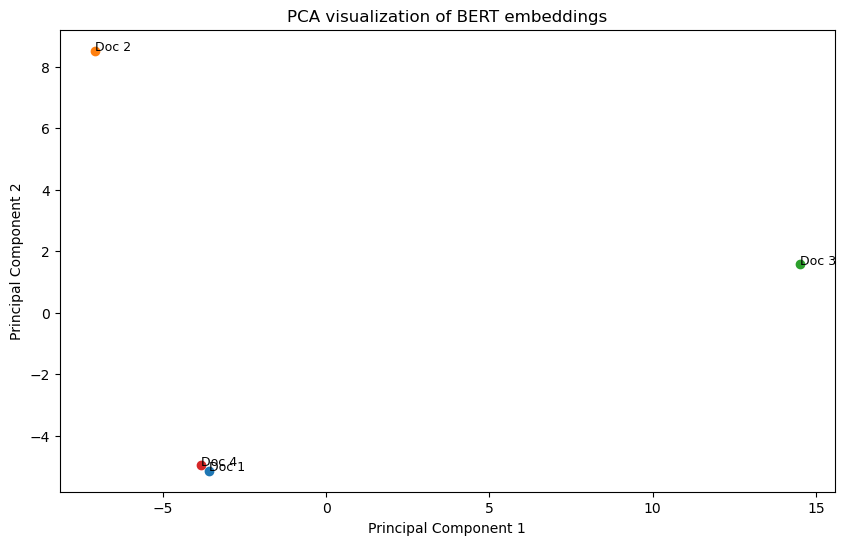

In [11]:
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# BERT 모델 및 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained('klue/bert-base')
model = TFBertModel.from_pretrained('klue/bert-base')

# 예시 문서
documents = [
    "저는 오늘 아침에 커피를 마시며, 어제 친구와 함께 갔던 영화관에 대해 이야기했습니다.",
    "그 영화는 정말 재미있었고, 다시 보고 싶은 생각이 들었습니다.",
    "오늘 날씨가 매우 좋습니다. 산책을 나가야겠어요.",
    "저는 어제 책을 읽었어요. 그 책은 정말 재미있었어요."
]

# 문서 임베딩 생성 함수
def embed_texts(texts, tokenizer, model):
    inputs = tokenizer(texts, return_tensors='tf', padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state[:, 0, :].numpy()  # CLS 토큰의 벡터 사용
    return embeddings

# 문서 임베딩
document_embeddings = embed_texts(documents, tokenizer, model)

# PCA 차원 축소
pca = PCA(n_components=2)
document_embeddings_2d = pca.fit_transform(document_embeddings)

# 시각화
plt.figure(figsize=(10, 6))
for i, text in enumerate(documents):
    plt.scatter(document_embeddings_2d[i, 0], document_embeddings_2d[i, 1])
    plt.text(document_embeddings_2d[i, 0], document_embeddings_2d[i, 1], f"Doc {i+1}", fontsize=9)

plt.title("PCA visualization of BERT embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

### Transfer Learning(전이 학습)
    사전 학습된 임베딩 모델을 사용하여 새로운 작업에 맞게 미세 조정(fine-tuning)하는 학습 방법
    기존 모델의 성능을 향상시키고, 새로운 데이터에 적응 가능

#### GloVe (Global Vectors for Word Representation)
    Stanford University에서 개발한 단어 임베딩 기법
    GloVe는 대규모 텍스트 코퍼스에서 단어의 동시 발생 통계 정보를 학습하여 각 단어를 고차원 벡터로 표현
    단어의 의미적 유사성을 반영하며, 자연어 처리(NLP) 작업에 유용하게 사용

    glove.6B.50d.txt 파일 사용
        6B: 60억 개의 단어 토큰으로 구성된 코퍼스(Wikipedia 2014 + Gigaword 5에서 학습)
        50d: 각 단어를 50차원 벡터로 표현(100d, 200d, 300d도 있음)

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, GlobalAveragePooling1D, Dense

# GloVe 임베딩 로드 함수
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

glove_embeddings = load_glove_embeddings('glove.6B.50d.txt')

#### GloVe 데이터 시각화

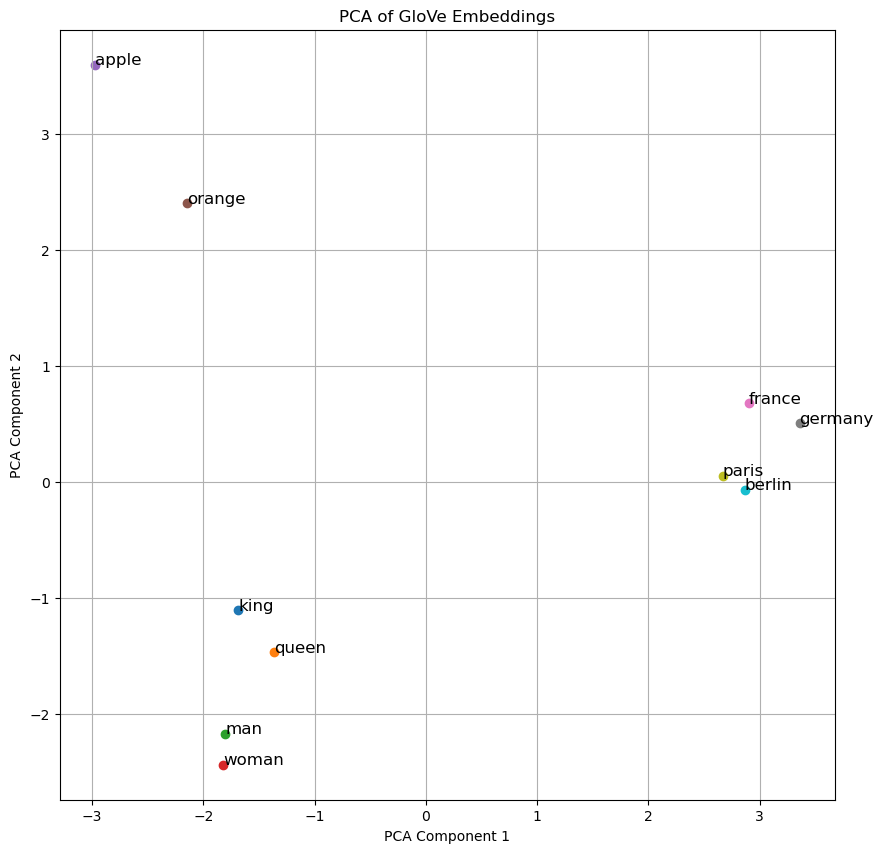

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 단어 목록
words = ['king', 'queen', 'man', 'woman', 'apple', 'orange', 'france', 'germany', 'paris', 'berlin']

# 해당 단어들의 임베딩 벡터 추출
embedding_vectors = np.array([glove_embeddings[word] for word in words])

# PCA를 사용하여 50차원 임베딩 벡터를 2차원으로 축소
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embedding_vectors)

# 결과 시각화
plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(pca_result[i, 0], pca_result[i, 1])
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]), fontsize=12)
plt.title('PCA of GloVe Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

#### 텍스트 데이터 전처리하기

In [14]:
# 예시 데이터 (감정 분석 데이터셋)
train_texts = [
    "이 영화 정말 최고에요!",
    "영화가 정말 지루했어요.",
    "배우들이 연기를 정말 잘했어요.",
    "스토리가 너무 별로였어요.",
    "정말 재미있는 영화였어요.",
    "시간이 아깝네요.",
    "다시 보고 싶은 영화입니다.",
    "연출이 뛰어났어요.",
    "배우들의 연기가 어색했어요.",
    "스토리가 정말 흥미로웠어요."
]
train_labels = [1, 0, 1, 0, 1, 0, 1, 1, 0, 1]  # 1: 긍정, 0: 부정

val_texts = [
    "정말 재미있는 영화였어요.",
    "시간이 아깝네요."
]
val_labels = [1, 0]

# 텍스트 토크나이징 및 시퀀스 패딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_texts)
train_padded = pad_sequences(train_sequences, padding='post')

val_sequences = tokenizer.texts_to_sequences(val_texts)
val_padded = pad_sequences(val_sequences, padding='post')

# 시퀀스 패딩
max_length = max(max(len(seq) for seq in train_sequences), max(len(seq) for seq in val_sequences))
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
val_padded = pad_sequences(val_sequences, padding='post', maxlen=max_length)

# 임베딩 매트릭스 생성
embedding_dim = 50
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

#### 전이 학습
    GloVe 데이터를 불러온 임베딩 벡터와 학습할 단어를 이용해서 만든 임베딩 매트릭스를 이용
    Embedding레이어를 만들 때 임베딩 매트릭스를 이용하여 가중치를 초기화
    이 후 학습할 데이터로 추가적인 학습을 하는 것

In [15]:
# 모델 정의
input_layer = Input(shape=(train_padded.shape[1],))
embedding_layer = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False)(input_layer)
lstm_layer = LSTM(128, return_sequences=False)(embedding_layer)
output_layer = Dense(1, activation='sigmoid')(lstm_layer)

model = Model(inputs=input_layer, outputs=output_layer)

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(train_padded, np.array(train_labels), epochs=10, validation_data=(val_padded, np.array(val_labels)))

# 모델 평가
loss, accuracy = model.evaluate(val_padded, np.array(val_labels))
print(f"모델 정확도: {accuracy:.4f}")

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.4000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6000 - loss: 0.6921 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.6000 - loss: 0.6911 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.6000 - loss: 0.6900 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.6000 - loss: 0.6888 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.6000 - loss: 0.6876 - val_accuracy: 0.5000 - val_loss: 0.6939
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.6000 - loss: 0.6863 - val_accuracy: 0.5000 - val_loss: 0.6942
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.6000 - loss: 0.6850 - val_accuracy: 0.5000 - val_loss: 0.6

#### 결과
    전이 학습을 했지만 학습할 데이터가 매우 적으므로 제대로된 학습 결과를 기대할 수는 없다.
    전이 학습의 흐름만 파악하는 예시이다.

### 텍스트 데이터를 임베딩하여 다양한 곳에 활용할 수 있다.